**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

Tamanho da imagem original:  (3692, 2812)
Downsampling ratio: 41.00
Tamanho da imagem nova:  (91, 69)


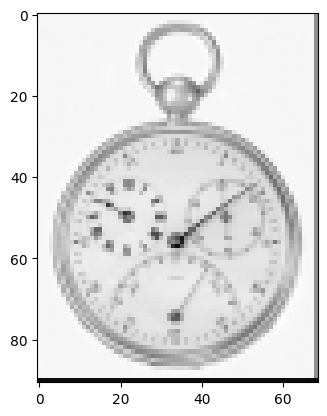

In [72]:
# type your code here
# Python code to read image
import cv2
import matplotlib.pyplot as plt
import numpy as np

def pad_image_to_ratio(img, ratio):
    """
    Pad image to a ratio
    :param img:
    :param ratio:
    :return:
    """
    # Calculate required padding
    pad_height = int(np.ceil(img.shape[0] / ratio) * ratio) - img.shape[0]
    pad_width = int(np.ceil(img.shape[1] / ratio) * ratio) - img.shape[1]

    # Pad image
    padded_img = np.pad(img, ((0, pad_height), (0, pad_width)), mode='constant')

    return padded_img

def downsampling(img, original_dpi, new_dpi, method='sampling'):
    """
        Downsampling an image: Reducing the number of pixels of an image
        :param img: image to be downsampled
        :param new_dpi: new dpi to be used
        :param method: method to be used, sampling or mean.
            Sampling just get one pixel for each ratio pixels, mean get the mean of each ratio pixels
    """
    # Checking if the new dpi is smaller than the original
    if original_dpi < new_dpi:
        raise ValueError("Downsampling: Novo DPI (%d) deve ser menor que o original (%d)" % (new_dpi, original_dpi))
    # Calculating the ratio
    ratio = int(original_dpi / new_dpi)
    print("Downsampling ratio: %.2f" % ratio)

    if method == 'mean':
        # Padding image to the ratio because the image may not be divisible by the ratio
        img = pad_image_to_ratio(img, ratio)
        return img.reshape((int(img.shape[0]/ratio), int(ratio), int(img.shape[1]/ratio), int(ratio))).mean(axis=(1, 3))
    else:
        # Just resampling getting the adequate ratio of the original image to the new one
        # Suppose original: 1250
        # If new: 300 then the n_linhas = 3692 * 300 / 1250 = 887 and n_colunas = 2812 * 300 / 1250 = 675, the ratio is 3696/887 = 4.16 and 2812/675 = 4.16.
        return img[::int(ratio), ::int(ratio)]


original_dpi = 1250
img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
print('Tamanho da imagem original: ',img.shape)

# Se fosse usar opencv com método de interpolação
#img_300 = cv2.resize(img, (colunas_300, linhas_300), interpolation = cv2.INTER_AREA)


Downsampling ratio: 4.00
Downsampling ratio: 4.00
Downsampling ratio: 8.00
Downsampling ratio: 8.00
Downsampling ratio: 17.00
Downsampling ratio: 17.00
Downsampling ratio: 34.00
Downsampling ratio: 34.00


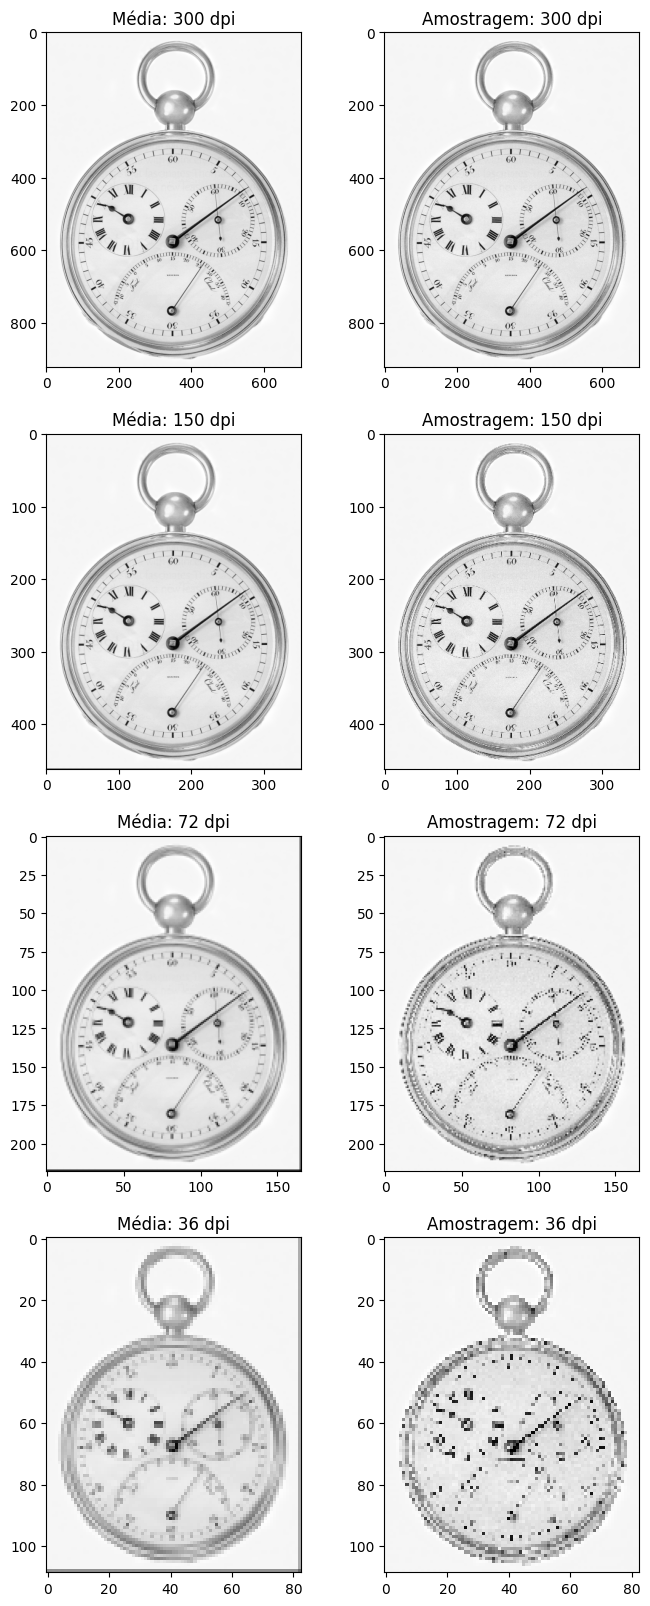

In [113]:
dpis = [300, 150, 72, 36]
f, axarr = plt.subplots(len(dpis), 2, figsize=(8, 20))
# iterate through dpis indexes and values
for i, dpi in enumerate(dpis):
    new_img_mean = downsampling(img, original_dpi, dpi, method='mean')
    new_img_smpl = downsampling(img, original_dpi, dpi, method='sampling')
    axarr[i,0].set_title('Média: %d dpi' % dpi)
    axarr[i,0].imshow(new_img_mean, cmap='gray', vmin=0, vmax=255)
    axarr[i,1].set_title('Amostragem: %d dpi' % dpi)
    axarr[i,1].imshow(new_img_smpl, cmap='gray', vmin=0, vmax=255)



2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão